Blood Groups Available: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
Sample count per blood group:
A+: 565 samples
A-: 1009 samples
AB+: 708 samples
AB-: 761 samples
B+: 652 samples
B-: 741 samples
O+: 852 samples
O-: 712 samples


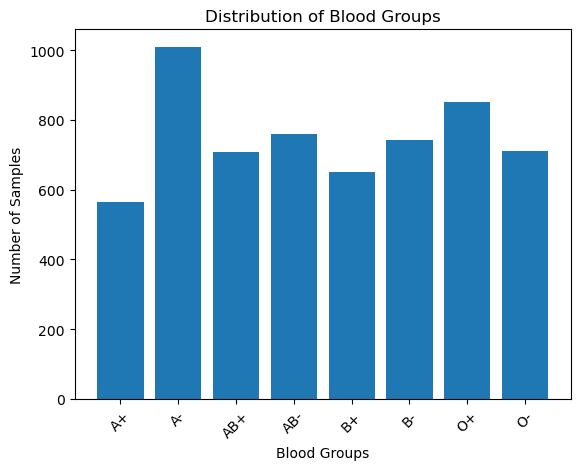

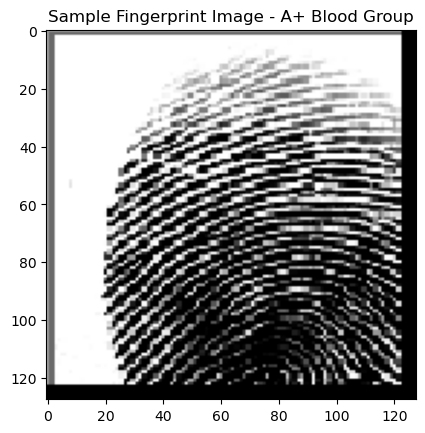

In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Path to the dataset directory
dataset_path = r"C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group"

# List of all blood group directories
blood_groups = os.listdir(dataset_path)
print("Blood Groups Available:", blood_groups)

# Count number of samples for each blood group
sample_count = {}
for group in blood_groups:
    sample_count[group] = len(os.listdir(os.path.join(dataset_path, group)))

print("Sample count per blood group:")
for group, count in sample_count.items():
    print(f"{group}: {count} samples")

# Visualize the distribution of blood groups
plt.bar(sample_count.keys(), sample_count.values())
plt.xlabel('Blood Groups')
plt.ylabel('Number of Samples')
plt.title('Distribution of Blood Groups')
plt.xticks(rotation=45)
plt.show()

# Visualize a few images from one blood group (e.g., A+)
sample_image = os.listdir(os.path.join(dataset_path, 'A+'))[0]
img = load_img(os.path.join(dataset_path, 'A+', sample_image), target_size=(128, 128))

plt.imshow(img)
plt.title('Sample Fingerprint Image - A+ Blood Group')
plt.show()


In [11]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

# Path to the dataset directory
dataset_path = r"C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group"

# List all blood group directories (classes)
blood_groups = os.listdir(dataset_path)
print("Blood Groups Available:", blood_groups)

# Count the number of samples per blood group
sample_count = {}
for group in blood_groups:
    sample_count[group] = len(os.listdir(os.path.join(dataset_path, group)))

# Display number of images in each blood group class
print("Sample count per blood group:")
for group, count in sample_count.items():
    print(f"{group}: {count} samples")


Blood Groups Available: ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']
Sample count per blood group:
A+: 565 samples
A-: 1009 samples
AB+: 708 samples
AB-: 761 samples
B+: 652 samples
B-: 741 samples
O+: 852 samples
O-: 712 samples


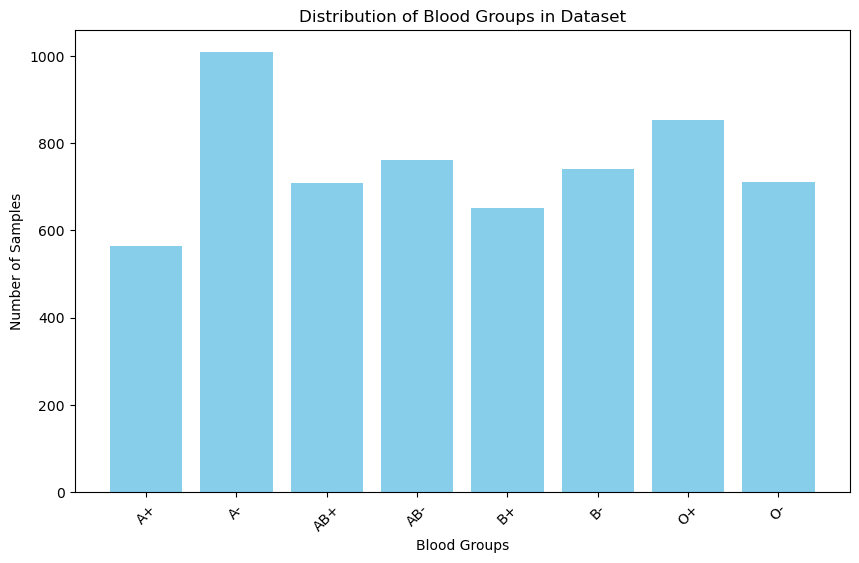

In [13]:
# Visualize the distribution of samples across blood groups
plt.figure(figsize=(10,6))
plt.bar(sample_count.keys(), sample_count.values(), color='skyblue')
plt.xlabel('Blood Groups')
plt.ylabel('Number of Samples')
plt.title('Distribution of Blood Groups in Dataset')
plt.xticks(rotation=45)
plt.show()


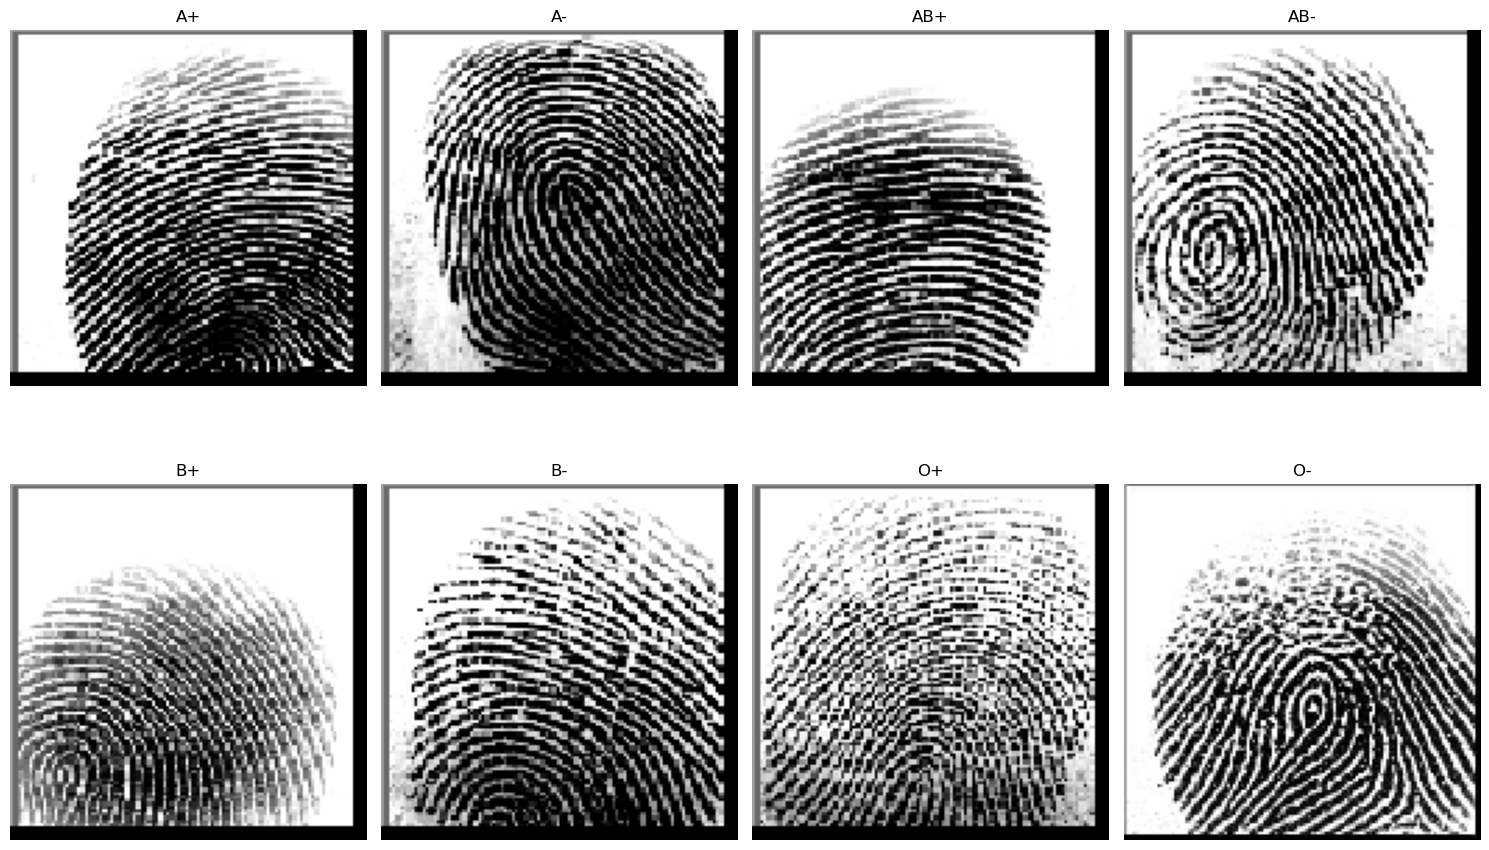

In [15]:
# Display one sample image from each blood group
plt.figure(figsize=(15, 10))
for i, group in enumerate(blood_groups):
    sample_image = os.listdir(os.path.join(dataset_path, group))[0]
    img_path = os.path.join(dataset_path, group, sample_image)
    img = load_img(img_path, target_size=(128, 128))  # Resize image to (128, 128)
    
    plt.subplot(2, 4, i+1)  # Arrange images in a grid (2 rows, 4 columns)
    plt.imshow(img)
    plt.title(group)
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()
plt.show()


In [17]:
# Check the dimensions of images in each class
image_sizes = {}
for group in blood_groups:
    image_path = os.path.join(dataset_path, group, os.listdir(os.path.join(dataset_path, group))[0])
    img = load_img(image_path)
    img_size = img.size  # Get the size of the image (width, height)
    image_sizes[group] = img_size

print("Image Sizes for Each Blood Group:")
for group, size in image_sizes.items():
    print(f"{group}: {size}")


Image Sizes for Each Blood Group:
A+: (96, 103)
A-: (96, 103)
AB+: (96, 103)
AB-: (96, 103)
B+: (96, 103)
B-: (96, 103)
O+: (96, 103)
O-: (241, 298)


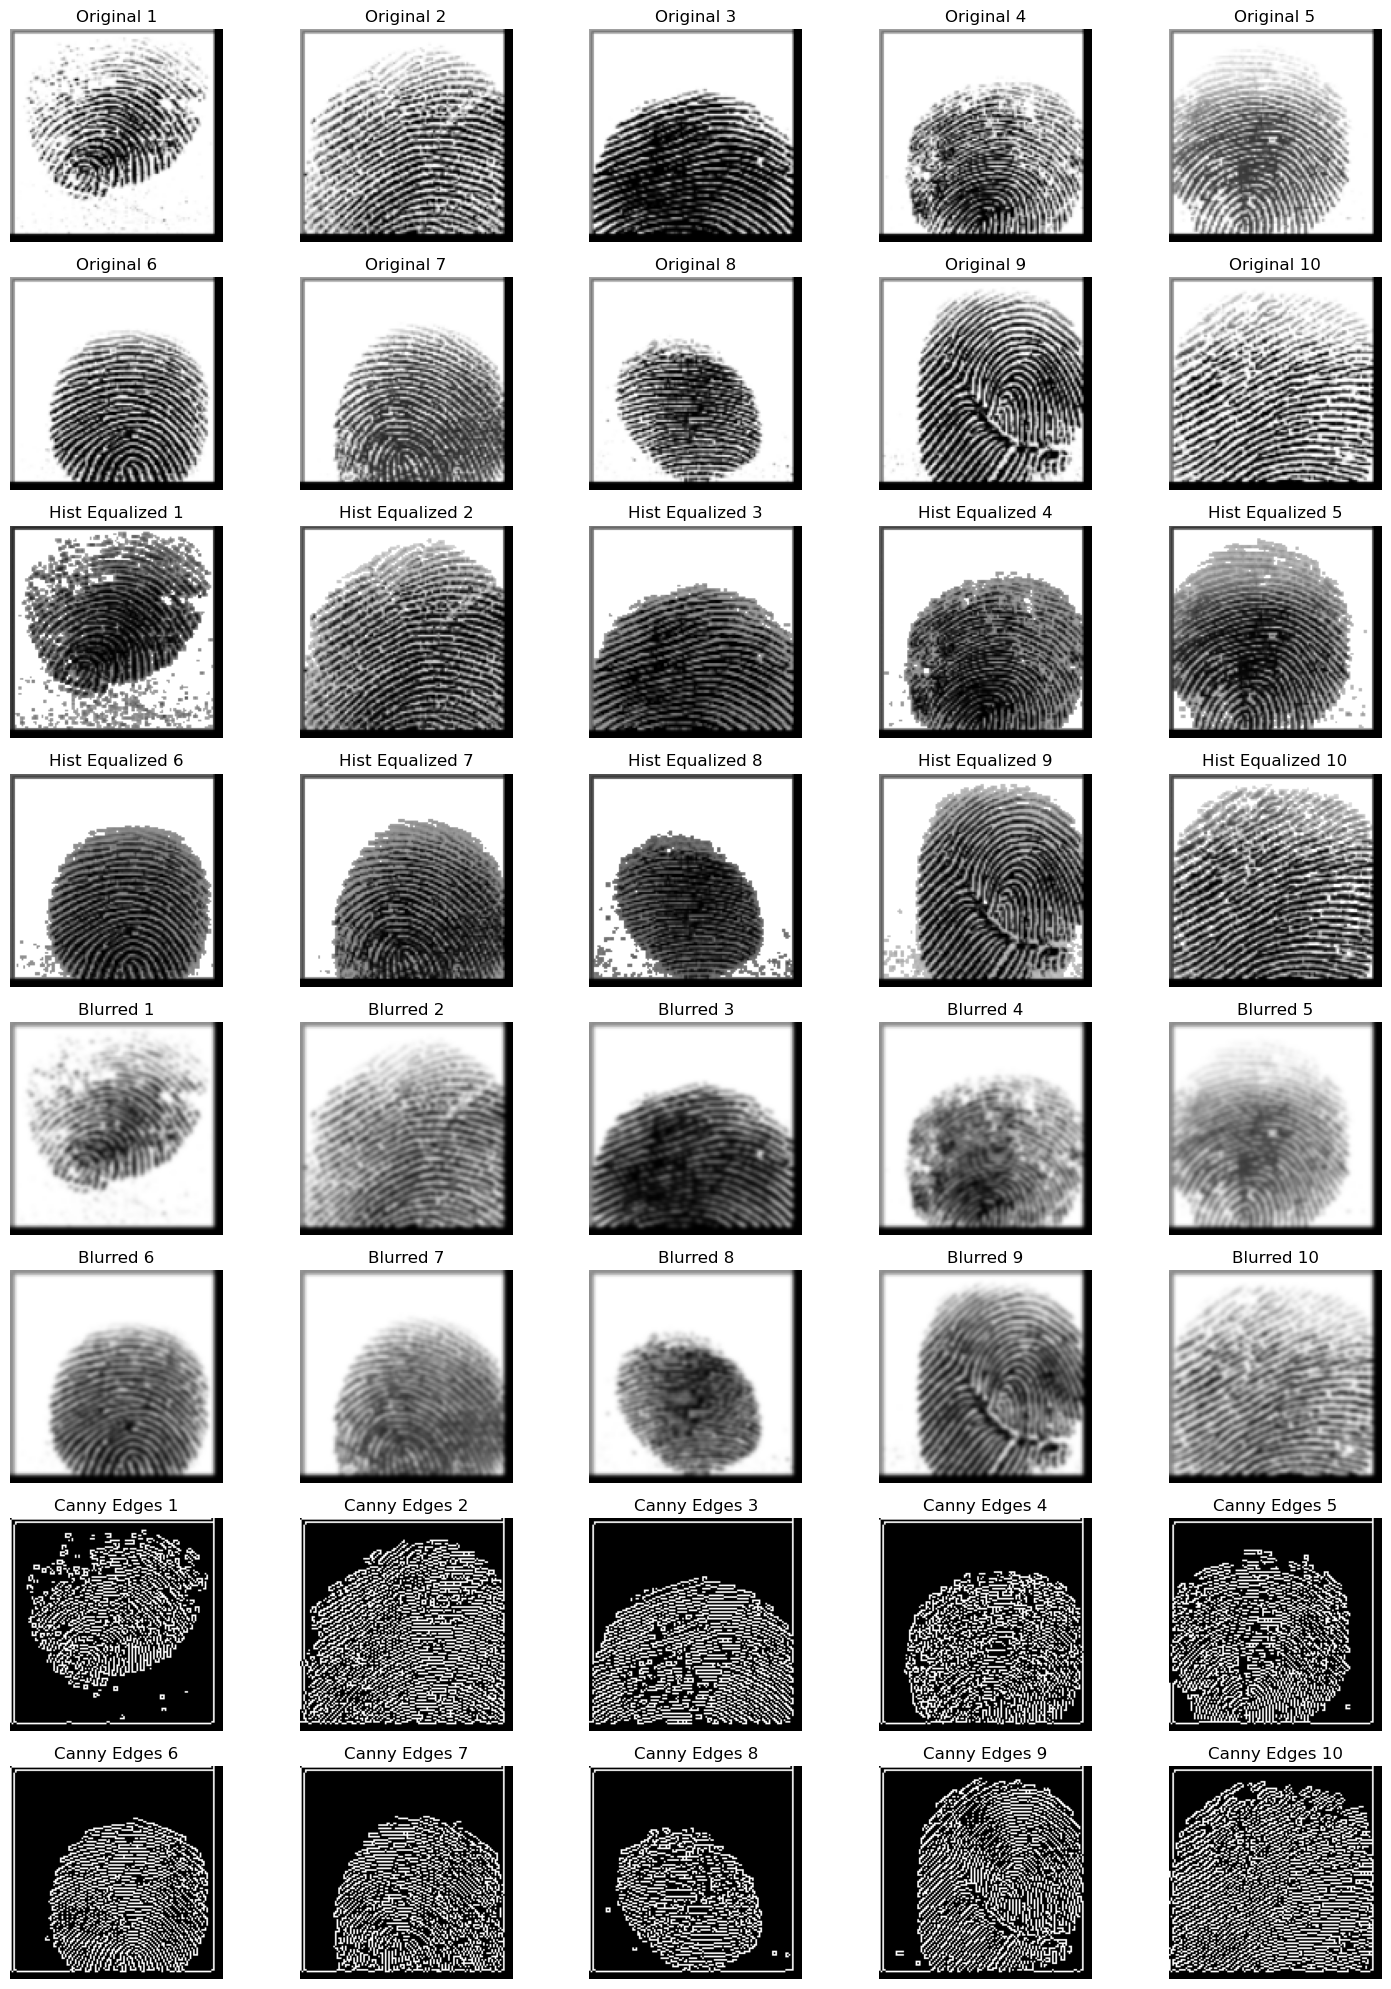

Randomly selected images:
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB-\cluster_5_3468.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\O+\cluster_6_4839.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB+\cluster_4_3264.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB+\cluster_4_321.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB-\cluster_5_5360.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB+\cluster_4_515.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\AB+\cluster_4_4010.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\B+\cluster_2_2373.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\A+\cluster_0_551.BMP
C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\A+\cluster_0_1730.BMP


In [21]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Path to the dataset directory
dataset_path = r"C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group"

# List all blood group directories (classes)
blood_groups = os.listdir(dataset_path)

# List to hold all .bmp file paths
bmp_files = []

# Iterate through each blood group directory and collect all .bmp files
for group in blood_groups:
    group_dir = os.path.join(dataset_path, group)
    # Only pick .bmp files from the directory
    for file_name in os.listdir(group_dir):
        if file_name.lower().endswith('.bmp'):
            bmp_files.append(os.path.join(group_dir, file_name))

# Randomly select 10 .bmp images
random_selected_files = random.sample(bmp_files, 10)

# Function to apply Histogram Equalization
def apply_histogram_equalization(image):
    # Convert to grayscale if it's a colored image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    return cv2.equalizeHist(image)

# Function to apply Gaussian Blur
def apply_gaussian_blur(image):
    # Apply Gaussian Blur to the image
    return cv2.GaussianBlur(image, (5, 5), 0)

# Function to apply Canny Edge Detection
def apply_canny_edge_detection(image):
    # Convert to grayscale if it's a colored image
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply Canny edge detection
    return cv2.Canny(image, threshold1=100, threshold2=200)

# Plot the original and enhanced images
plt.figure(figsize=(15, 20))  # Increased figure height to accommodate 40 images (10x4)

for i, file_path in enumerate(random_selected_files):
    # Load the image
    img = cv2.imread(file_path)
    # Resize for display
    img_resized = cv2.resize(img, (128, 128))

    # Apply image enhancement techniques
    hist_equalized_img = apply_histogram_equalization(img_resized)
    blurred_img = apply_gaussian_blur(img_resized)
    canny_edges_img = apply_canny_edge_detection(img_resized)

    # Plotting original and enhanced images
    plt.subplot(8, 5, i + 1)  # Adjusted the subplot grid to 8 rows and 5 columns
    plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
    plt.title(f"Original {i+1}")
    plt.axis('off')

    plt.subplot(8, 5, i + 11)  # Shifted by 10 for histogram equalized images
    plt.imshow(hist_equalized_img, cmap='gray')
    plt.title(f"Hist Equalized {i+1}")
    plt.axis('off')

    plt.subplot(8, 5, i + 21)  # Shifted by 20 for blurred images
    plt.imshow(blurred_img, cmap='gray')
    plt.title(f"Blurred {i+1}")
    plt.axis('off')

    plt.subplot(8, 5, i + 31)  # Shifted by 30 for Canny edge-detected images
    plt.imshow(canny_edges_img, cmap='gray')
    plt.title(f"Canny Edges {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Print the file paths of the selected images for reference
print("Randomly selected images:")
for file_path in random_selected_files:
    print(file_path)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize and normalize images
img_size = (128, 128)  # resizing to 128x128 pixels
batch_size = 32

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow data from the directories, split into train and validation sets
train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Use this for training data
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Use this for validation data
)

# Check the class labels and verify the classes
print("Class labels (blood groups):", train_gen.class_indices)


Found 4803 images belonging to 8 classes.
Found 1197 images belonging to 8 classes.
Class labels (blood groups): {'A+': 0, 'A-': 1, 'AB+': 2, 'AB-': 3, 'B+': 4, 'B-': 5, 'O+': 6, 'O-': 7}


In [5]:
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

# Building the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')  # 8 blood groups (output layer)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

# Save the trained model
model.save(r'C:\Users\vinna\Downloads\Blood Group Data\dataset_blood_group\blood_group_fingerprint_model.h5')

# Print a summary of the model architecture
model.summary()


Epoch 1/10


C:\Users\vinna\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\vinna\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 27s 164ms/step - accuracy: 0.3097 - loss: 1.8418 - val_accuracy: 0.7686 - val_loss: 0.5999
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - accuracy: 0.8234 - loss: 0.4633 - val_accuracy: 0.8488 - val_loss: 0.3837
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 25s 162ms/step - accuracy: 0.8571 - loss: 0.3599 - val_accuracy: 0.8212 - val_loss: 0.4352
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 156ms/step - accuracy: 0.8739 - loss: 0.3308 - val_accuracy: 0.8822 - val_loss: 0.2825
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.9003 - loss: 0.2357 - val_accuracy: 0.8897 - val_loss: 0.2657
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.9162 - loss: 0.2180 - val_accuracy: 0.8997 - val_loss: 0.2606
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.9118 - loss: 0.2168 - val_accuracy: 0.9089 - val_loss: 0.2173
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - accuracy: 0.9296 - loss: 0.1724 - val

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,917,018 (37.83 MB)

 Trainable params: 3,305,672 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,346 (25.22 MB)

In [7]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8428 - loss: 0.5274
Validation Loss: 0.48019683361053467
Validation Accuracy: 0.8487886190414429
